In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-loan-approval/loan_sanction_test.csv
/kaggle/input/home-loan-approval/loan_sanction_train.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")

# Reading data

In [3]:
df_test=pd.read_csv("/kaggle/input/home-loan-approval/loan_sanction_test.csv")
df_train=pd.read_csv("/kaggle/input/home-loan-approval/loan_sanction_train.csv")

In [4]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [9]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# Filling missing values

In [10]:
columns_to_fill = ['Gender', 'Married', 'Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']
for column in columns_to_fill:
    mode_value = df_train[column].mode()[0]  
    df_train[column].fillna(mode_value, inplace=True)
    

In [11]:
columns_to_fill_test = ['Gender', 'Married', 'Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']
for column in columns_to_fill_test:
    mode_value = df_test[column].mode()[0]  
    df_test[column].fillna(mode_value, inplace=True)

# Encoding

In [12]:
le1 = preprocessing.LabelEncoder()
df_train['Gender'] =le1.fit_transform(df_train['Gender'])
le2 = preprocessing.LabelEncoder()
df_train['Married'] =le2.fit_transform(df_train['Married'])
le3 = preprocessing.LabelEncoder()
df_train['Dependents'] =le3.fit_transform(df_train['Dependents'])
le4 = preprocessing.LabelEncoder()
df_train['Education'] =le4.fit_transform(df_train['Education'])
le5 = preprocessing.LabelEncoder()
df_train['Self_Employed'] =le5.fit_transform(df_train['Self_Employed'])
le6 = preprocessing.LabelEncoder()
df_train['Property_Area'] =le6.fit_transform(df_train['Property_Area'])
le7 = preprocessing.LabelEncoder()
df_train['Loan_Status'] =le7.fit_transform(df_train['Loan_Status'])


In [13]:
df = df_train.drop(['Loan_ID'], axis=1)

# Data Visualization

In [14]:
fig = px.scatter(df_train, x='ApplicantIncome', y='LoanAmount', color='Loan_Status', title="ApplicantIncome vs LoanAmount")
fig.show(renderer='iframe')

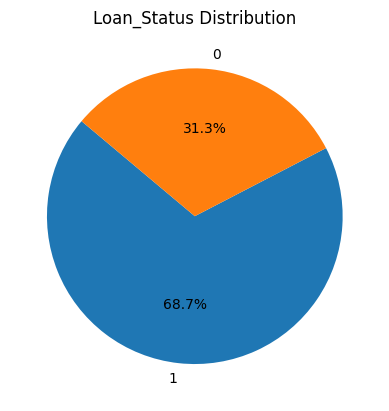

In [15]:
Approval_counts = df_train['Loan_Status'].value_counts()
plt.pie(Approval_counts, labels=Approval_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Loan_Status Distribution')
plt.show()

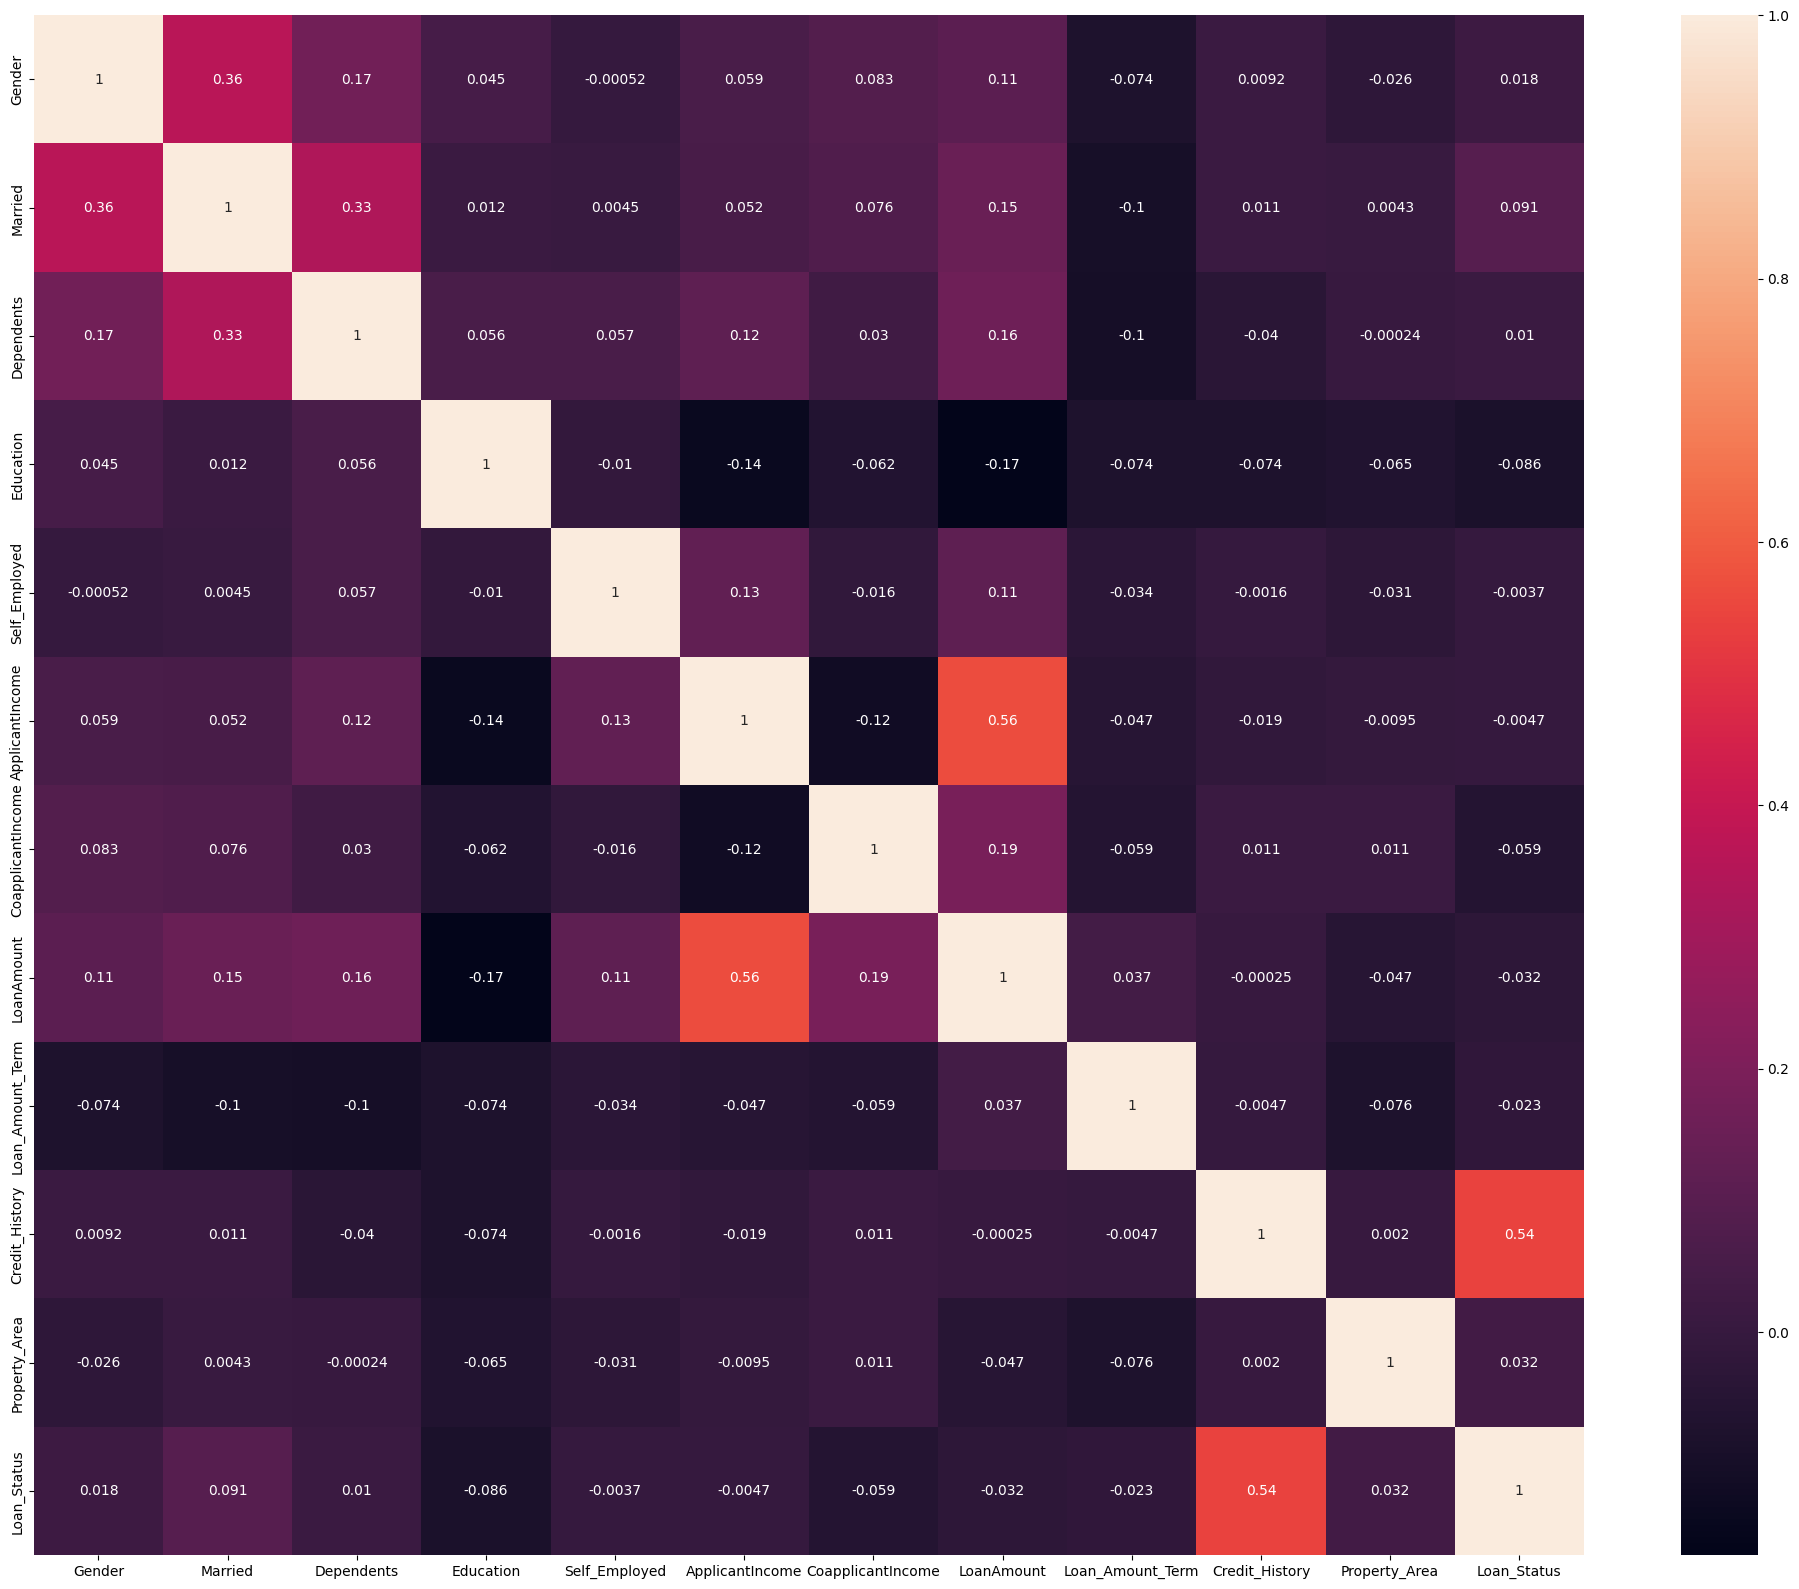

In [16]:
numerical_data = df_train.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_data.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True)
plt.show()   

In [17]:
threshold=0.01
correlation_matrix=df.corr()
high_corr_features=correlation_matrix.index[abs(correlation_matrix["Loan_Status"])>threshold].tolist()
high_corr_features.remove("Loan_Status")
print("Selected features based on correlation with target:")
print(high_corr_features)
X_selected=df[high_corr_features]
y=df["Loan_Status"]

Selected features based on correlation with target:
['Gender', 'Married', 'Dependents', 'Education', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


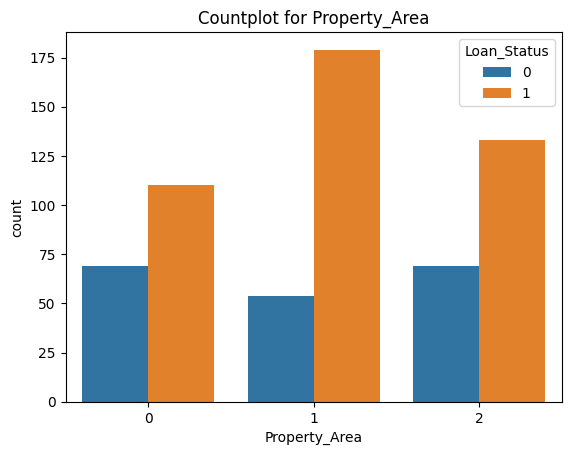

In [18]:
sns.countplot(x='Property_Area',hue='Loan_Status', data=df)
plt.title('Countplot for Property_Area')
plt.show()

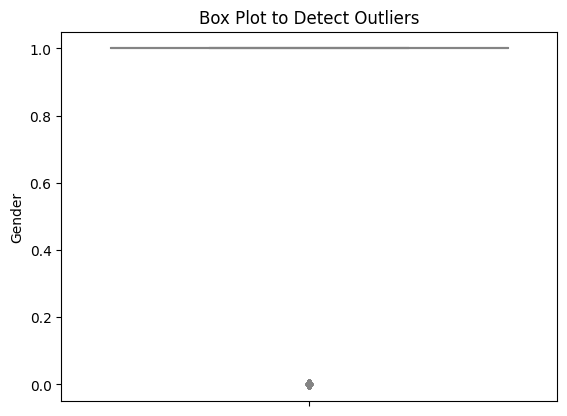

<Figure size 800x400 with 0 Axes>

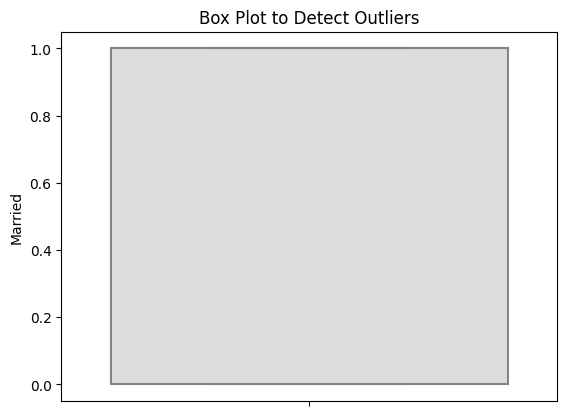

<Figure size 800x400 with 0 Axes>

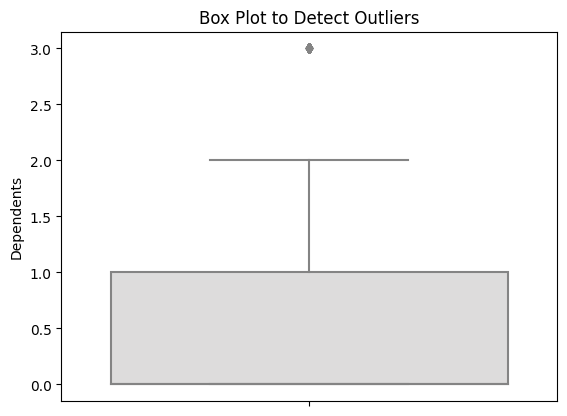

<Figure size 800x400 with 0 Axes>

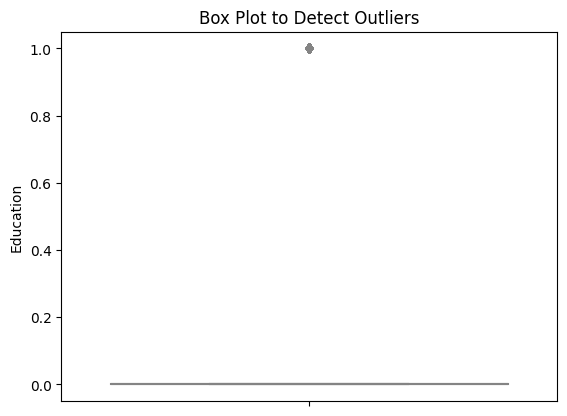

<Figure size 800x400 with 0 Axes>

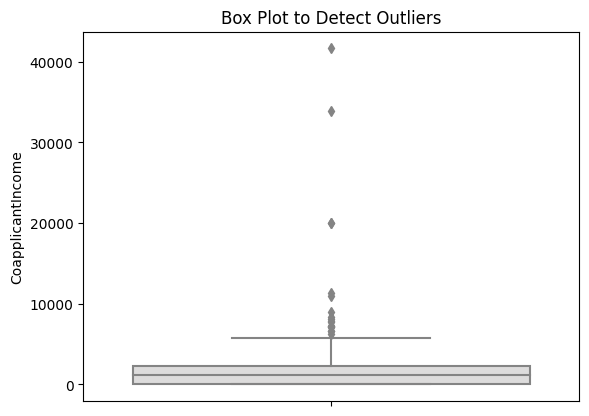

<Figure size 800x400 with 0 Axes>

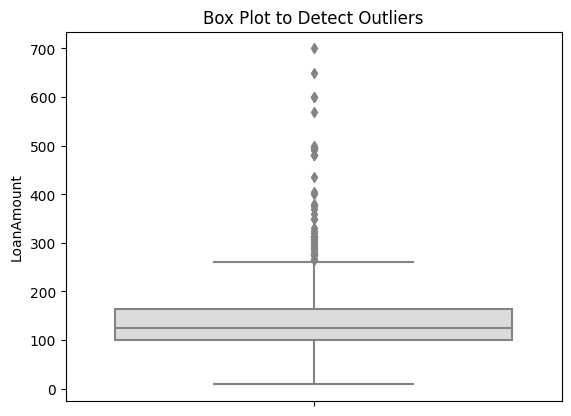

<Figure size 800x400 with 0 Axes>

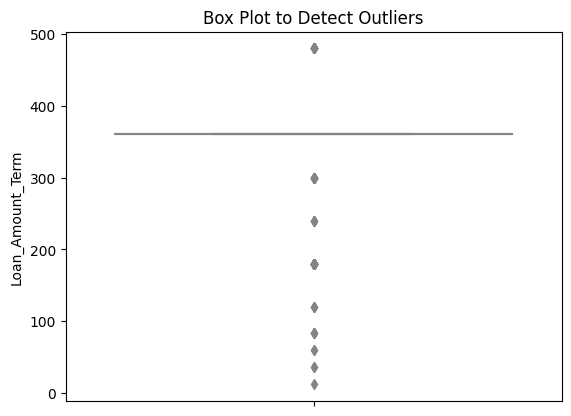

<Figure size 800x400 with 0 Axes>

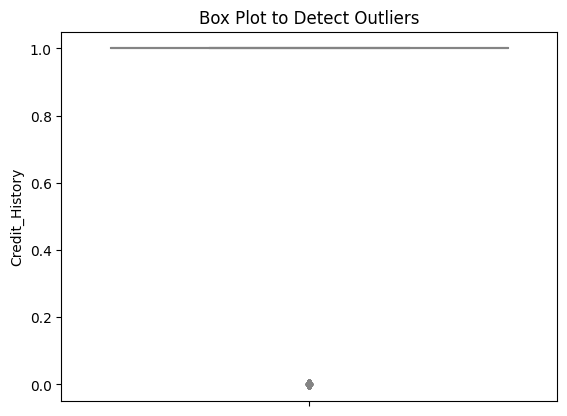

<Figure size 800x400 with 0 Axes>

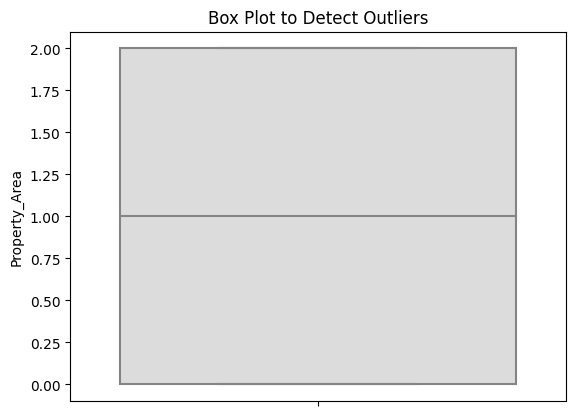

<Figure size 800x400 with 0 Axes>

In [19]:
for column in X_selected:
    sns.boxplot(y=column, data=df,palette='coolwarm')
    plt.title("Box Plot to Detect Outliers")
    plt.figure(figsize=(8, 4))
    plt.show()

In [20]:
scaler = MinMaxScaler()
x=scaler.fit_transform(X_selected)

In [21]:
X_train, X_test, Y_train, Y_test= train_test_split(x,y, test_size=0.3, shuffle = True, random_state=42)

# SVM

In [22]:
svc_model=SVC()
svc_model.fit(X_train,Y_train)

SVC()

In [23]:
svc_model.score(X_train,Y_train)
Y_pred_svc=svc_model.predict(X_test)

In [24]:
print(accuracy_score(Y_pred_svc, Y_test))

0.7837837837837838


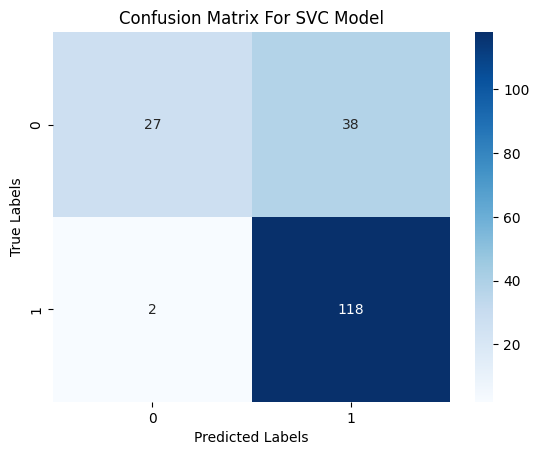

In [25]:
cm_svc = confusion_matrix(Y_test, Y_pred_svc)
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1' ])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For SVC Model')
plt.show()

In [26]:
print(classification_report(Y_pred_svc, Y_test))

              precision    recall  f1-score   support

           0       0.42      0.93      0.57        29
           1       0.98      0.76      0.86       156

    accuracy                           0.78       185
   macro avg       0.70      0.84      0.71       185
weighted avg       0.89      0.78      0.81       185



# Random Forest

In [27]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,Y_train)

RandomForestClassifier()

In [28]:
Y_pred_rf=rf_model.predict(X_test)
print(accuracy_score(Y_pred_rf, Y_test))

0.7837837837837838


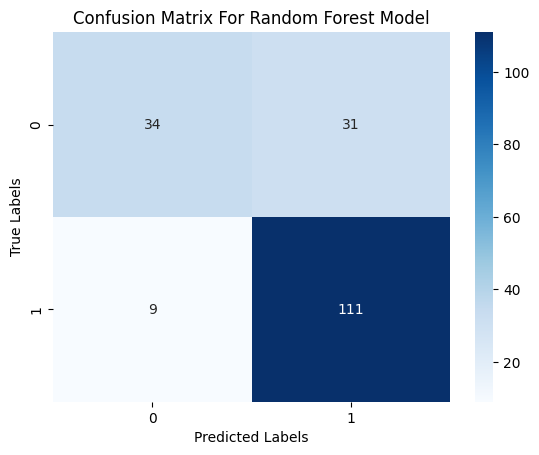

In [29]:
cm_rf = confusion_matrix(Y_test, Y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1' ])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Random Forest Model')
plt.show()

In [30]:
print(classification_report(Y_pred_rf, Y_test))

              precision    recall  f1-score   support

           0       0.52      0.79      0.63        43
           1       0.93      0.78      0.85       142

    accuracy                           0.78       185
   macro avg       0.72      0.79      0.74       185
weighted avg       0.83      0.78      0.80       185

